In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [12]:
# 1. Đọc dữ liệu từ file CSV
df = pd.read_csv('Gold_Price.csv')

In [13]:
# Hiển thị thông tin tổng quan về dữ liệu
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2227 entries, 0 to 2226
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2227 non-null   object 
 1   Price   2227 non-null   int64  
 2   Open    2227 non-null   int64  
 3   High    2227 non-null   int64  
 4   Low     2227 non-null   int64  
 5   Volume  2227 non-null   int64  
 6   Chg%    2227 non-null   float64
dtypes: float64(1), int64(5), object(1)
memory usage: 121.9+ KB
None


In [14]:
df.columns

Index(['Date', 'Price', 'Open', 'High', 'Low', 'Volume', 'Chg%'], dtype='object')

In [15]:
X = df.drop(columns=['Price', 'Date'])  # Loại bỏ cột 'Price' và 'Date' nếu không sử dụng cột Date
y = df['Price']  # Cột mục tiêu

In [16]:
# 3. Chia dữ liệu thành tập huấn luyện và kiểm thử (70% huấn luyện, 30% kiểm thử)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [17]:
def compare_predictions(y_test, y_pred, model_name):
    comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
    print(f"\nComparison for {model_name} model:")
    print(comparison.head())  # Hiển thị 5 giá trị đầu tiên

In [20]:
df.head()

,Date,Price,Open,High,Low,Volume,Chg%
0,1/1/2014,29542,29435,29598,29340,2930,0.25
1,1/2/2014,29975,29678,30050,29678,3140,1.47
2,1/3/2014,29727,30031,30125,29539,3050,-0.83
3,1/4/2014,29279,29279,29279,29279,0,-1.51
4,1/6/2014,29119,29300,29395,29051,24380,-0.55


In [18]:
# 4. Linear Regression
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)
compare_predictions(y_test, y_pred_lr, "Linear Regression")


Comparison for Linear Regression model:
      Actual     Predicted
56     30169  30171.247734
494    25490  25449.332489
1676   47907  47804.284353
218    26940  26834.734397
744    30057  30029.967206


In [19]:


# 2. Huấn luyện mô hình trên tập huấn luyện
model_lr.fit(X_train, y_train)

# 3. Dự đoán trên tập huấn luyện và tập kiểm thử
y_train_pred = model_lr.predict(X_train)
y_test_pred = model_lr.predict(X_test)

# 4. Tính toán chỉ số R^2 trên cả tập huấn luyện và tập kiểm thử
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# 5. In kết quả R^2
print(f'R^2 on training set: {r2_train}')
print(f'R^2 on test set: {r2_test}')

R^2 on training set: 0.9998476067736126
R^2 on test set: 0.9998930081441777


In [20]:
# 5. Ridge Regression
model_ridge = Ridge(alpha=1.0)
model_ridge.fit(X_train, y_train)
y_pred_ridge = model_ridge.predict(X_test)
compare_predictions(y_test, y_pred_ridge, "Ridge Regression")


Comparison for Ridge Regression model:
      Actual     Predicted
56     30169  30171.330747
494    25490  25449.459097
1676   47907  47804.291637
218    26940  26835.039498
744    30057  30029.977222


In [21]:

# Khởi tạo và huấn luyện Ridge Regression
ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X_train, y_train)

# Dự đoán và tính toán R^2
y_train_pred_ridge = ridge_reg.predict(X_train)
y_test_pred_ridge = ridge_reg.predict(X_test)
r2_train_ridge = r2_score(y_train, y_train_pred_ridge)
r2_test_ridge = r2_score(y_test, y_test_pred_ridge)

print(f'R^2 on training set (Ridge): {r2_train_ridge}')
print(f'R^2 on test set (Ridge): {r2_test_ridge}')


R^2 on training set (Ridge): 0.9998476064120411
R^2 on test set (Ridge): 0.9998929905406297


In [22]:
# 6. Neural Network (MLPRegressor)
model_nn = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=500)
model_nn.fit(X_train, y_train)
y_pred_nn = model_nn.predict(X_test)
compare_predictions(y_test, y_pred_nn, "Neural Network")


Comparison for Neural Network model:
      Actual     Predicted
56     30169  30292.338651
494    25490  25524.375429
1676   47907  47549.085971
218    26940  27069.682943
744    30057  30098.088734



Comparison for Stacking model:
      Actual     Predicted
56     30169  30178.565852
494    25490  25453.279387
1676   47907  47793.277598
218    26940  26846.512297
744    30057  30033.403348


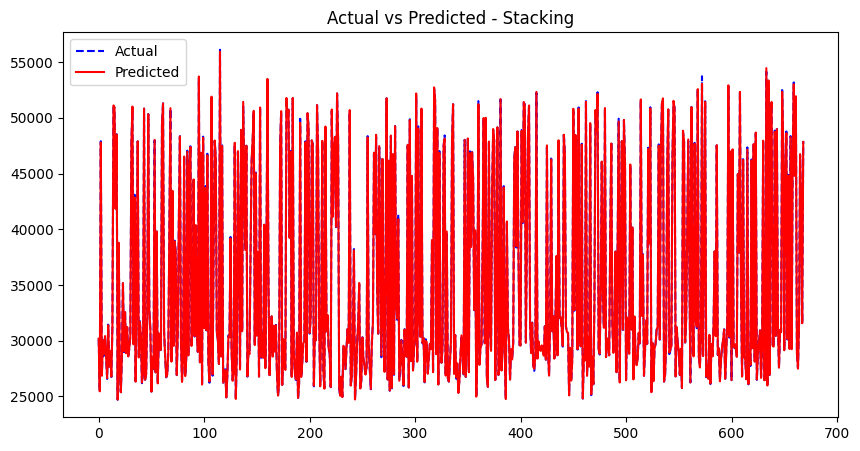

In [24]:
# 7. Stacking Model
estimators = [
    ('lr', LinearRegression()),
    ('ridge', Ridge(alpha=1.0)),
    ('nn', MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=500))
]
stacking_model = StackingRegressor(estimators=estimators, final_estimator=LinearRegression())
stacking_model.fit(X_train, y_train)
y_pred_stack = stacking_model.predict(X_test)
compare_predictions(y_test, y_pred_stack, "Stacking")

In [25]:
# 8. Đánh giá mô hình bằng các chỉ số như MSE, MAE, R²
def evaluate_model(y_test, y_pred, model_name):
    print(f"\n{model_name} Model Evaluation:")
    print("MSE:", mean_squared_error(y_test, y_pred))
    print("MAE:", mean_absolute_error(y_test, y_pred))
    print("R²:", r2_score(y_test, y_pred))

# Đánh giá từng mô hình
evaluate_model(y_test, y_pred_lr, "Linear Regression")
evaluate_model(y_test, y_pred_ridge, "Ridge Regression")
evaluate_model(y_test, y_pred_nn, "Neural Network")
evaluate_model(y_test, y_pred_stack, "Stacking")


Linear Regression Model Evaluation:
MSE: 8916.032070651745
MAE: 62.84603297789227
R²: 0.9998930081441777

Ridge Regression Model Evaluation:
MSE: 8917.499040226705
MAE: 62.8440479546778
R²: 0.9998929905406297

Neural Network Model Evaluation:
MSE: 57866.069281926044
MAE: 141.89008795300305
R²: 0.9993056106020527

Stacking Model Evaluation:
MSE: 9023.746890431625
MAE: 62.85082560205341
R²: 0.9998917155727315


In [23]:
%matplotlib inline
# Vẽ đồ thị so sánh giữa Actual và Predicted
def compare_predictions(y_test, y_pred, model_name):
    comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
    print(f"\nComparison for {model_name} model:")
    print(comparison.head())  # Hiển thị 5 giá trị đầu tiên

    # Đảm bảo rằng y_test và y_pred có cùng kích thước trước khi vẽ
    y_test = y_test.reset_index(drop=True)  # Đặt lại chỉ mục của y_test
    plt.figure(figsize=(10, 5))
    plt.plot( y_test, label='Actual', color='blue', linestyle='--')
    plt.plot(y_pred, label='Predicted', color='red')
    plt.title(f"Actual vs Predicted - {model_name}")
    plt.legend()
    plt.show()
